In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, s
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv('../datasets/petr4.sa-treinamento.csv')

In [4]:
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-29,26.780001,27.170000,26.780001,26.969999,23.695459,20295300.0
1,2010-12-30,27.290001,27.440001,27.090000,27.290001,23.976610,29619400.0
2,2011-01-03,27.500000,27.580000,26.910000,27.000000,23.721819,22738500.0
3,2011-01-04,27.010000,27.059999,26.400000,26.900000,23.633959,30936600.0
4,2011-01-05,26.680000,27.350000,26.580000,27.219999,23.915110,24306800.0


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 7 columns):
Date         1886 non-null object
Open         1844 non-null float64
High         1844 non-null float64
Low          1844 non-null float64
Close        1844 non-null float64
Adj Close    1844 non-null float64
Volume       1844 non-null float64
dtypes: float64(6), object(1)
memory usage: 103.2+ KB


In [6]:
base = base.dropna()

In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1885
Data columns (total 7 columns):
Date         1844 non-null object
Open         1844 non-null float64
High         1844 non-null float64
Low          1844 non-null float64
Close        1844 non-null float64
Adj Close    1844 non-null float64
Volume       1844 non-null float64
dtypes: float64(6), object(1)
memory usage: 115.2+ KB


In [8]:
base_treinamento = base.iloc[:, 1:2].values
base_treinamento

array([[26.780001],
       [27.290001],
       [27.5     ],
       ...,
       [19.6     ],
       [19.950001],
       [19.620001]])

In [9]:
normalizador = MinMaxScaler(feature_range=(0,1))
normalizador

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_treinamento_normalizada

array([[0.91048391],
       [0.93104843],
       [0.93951613],
       ...,
       [0.62096774],
       [0.63508069],
       [0.62177423]])

### escolhi a minha série temporal de 90 dias, então preciso fazer a seguinte códificação para isso, aqui é importante entender como funciona uma série temporal, para isso assista a aula ###

In [11]:
previsores = []
preco_real = []

In [12]:
len(base_treinamento_normalizada)

1844

In [13]:
for i in range(90, len(base_treinamento_normalizada)):
    # repare que divido minhas amostras em séries temporais de 90 dias e o i do for começa em 90
    # 0 é para pegar a coluna de índice 0 
    previsores.append(base_treinamento_normalizada[ i - 90 : i, 0 ])
    preco_real.append(base_treinamento_normalizada[i , 0])

In [14]:
type(previsores)

list

In [15]:
# agora é necessário transformar as lista em array numpy
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [16]:
type(previsores)

numpy.ndarray

In [17]:
previsores

array([[0.91048391, 0.93104843, 0.93951613, ..., 0.7983871 , 0.81129032,
        0.81129032],
       [0.93104843, 0.93951613, 0.91975806, ..., 0.81129032, 0.81129032,
        0.81048383],
       [0.93951613, 0.91975806, 0.90645161, ..., 0.81129032, 0.81048383,
        0.7983871 ],
       ...,
       [0.68830645, 0.68467742, 0.6875    , ..., 0.61975806, 0.62903222,
        0.63508069],
       [0.68467742, 0.6875    , 0.71209681, ..., 0.62903222, 0.63508069,
        0.62096774],
       [0.6875    , 0.71209681, 0.70201617, ..., 0.63508069, 0.62096774,
        0.63508069]])

In [18]:
preco_real

array([0.81048383, 0.7983871 , 0.80120968, ..., 0.62096774, 0.63508069,
       0.62177423])

In [19]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1],1))
previsores

array([[[0.91048391],
        [0.93104843],
        [0.93951613],
        ...,
        [0.7983871 ],
        [0.81129032],
        [0.81129032]],

       [[0.93104843],
        [0.93951613],
        [0.91975806],
        ...,
        [0.81129032],
        [0.81129032],
        [0.81048383]],

       [[0.93951613],
        [0.91975806],
        [0.90645161],
        ...,
        [0.81129032],
        [0.81048383],
        [0.7983871 ]],

       ...,

       [[0.68830645],
        [0.68467742],
        [0.6875    ],
        ...,
        [0.61975806],
        [0.62903222],
        [0.63508069]],

       [[0.68467742],
        [0.6875    ],
        [0.71209681],
        ...,
        [0.62903222],
        [0.63508069],
        [0.62096774]],

       [[0.6875    ],
        [0.71209681],
        [0.70201617],
        ...,
        [0.63508069],
        [0.62096774],
        [0.63508069]]])

## Para este tipo de rede neural é recomendado não trabalhar com poucas camadas ocultas, pois se trabalhar ele não da bons resultados ##

In [20]:
rede = Sequential()
# neste caso o units é o número de celulas de mémoria, e ele deve ser grande para capturar mais dimensionalidade e 
# capturar a tendência 
# return_sequences = True é utilizado quando teremos mais de uma camada LSTM assim ela passa a informação para a próxima
# camada,
# input_shape()
rede.add(LSTM(units = 100, return_sequences= True, input_shape = (previsores.shape[1],1)))
rede.add(Dropout(0.3))


# a quantidade de neurônios pode variar de camáda para camada 
rede.add(LSTM(units = 50, return_sequences= True, input_shape = (previsores.shape[1],1)))
rede.add(Dropout(0.3))

rede.add(LSTM(units = 50, return_sequences= True, input_shape = (previsores.shape[1],1)))
rede.add(Dropout(0.3))


# a última camada recorrente não pode ter o parâmetro
rede.add(LSTM(units = 50, input_shape = (previsores.shape[1],1)))
rede.add(Dropout(0.3))

# adicionando a camada de saída, do tipo densa, ou seja todos os neurônios da última camada recorrente estarão ligados 
# a todos os neurônios da camada de saída
# a camada de saída tera uma unica saída (um único neurônio), já que precisamos da previsão de somente um valor
# neste caso precisamos que a saída seja 0 ou 1 então o linear ou sigmoid são uma opção 
rede.add(Dense(units = 1, activation = 'linear'))

# com o metrics = ['mean_absolute_error'] fica mais fácil para visualizarmos o resultado  

rede.compile(optimizer = 'rmsprop',
             loss = 'mean_squared_error',
             metrics = ['mean_absolute_error'])

rede.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
1754/1754 [==============================] - 15s 8ms/step - loss: 0.0255 - mean_absolute_error: 0.1205
Epoch 2/100
1754/1754 [==============================] - 12s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0905
Epoch 3/100
1754/1754 [==============================] - 13s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0837
Epoch 4/100
1754/1754 [==============================] - 23s 13ms/step - loss: 0.0100 - mean_absolute_error: 0.0758
Epoch 5/100
1754/1754 [==============================] - 17s 10ms/step - loss: 0.0084 - mean_absolute_error: 0.0697
Epoch 6/100
1754/1754 [==============================] - 14s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0632
Epoch 7/100
1754/1754 [==============================] - 14s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0600
Epoch 8/100
1754/1754 [==============================] - 13s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0592
Epoch 9/100
1754/1754 [==============================] - 15s 8ms/step - loss: 

In [22]:
base_teste = pd.read_csv('../datasets/petr4-teste.csv')

In [24]:
base_teste.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-01,19.59,20.010000,19.540001,20.010000,19.234995,39141700.0
1,2018-08-02,19.99,20.780001,19.950001,20.410000,19.619503,69008900.0
2,2018-08-03,21.40,21.549999,21.090000,21.110001,20.292391,86908000.0
3,2018-08-06,21.15,21.469999,20.980000,21.040001,20.225101,44528300.0
4,2018-08-07,21.33,21.459999,20.570000,20.709999,19.907881,69136700.0


In [25]:
base_teste.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [26]:
base_teste = base_teste.dropna()

In [28]:
base_teste.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-01,19.59,20.010000,19.540001,20.010000,19.234995,39141700.0
1,2018-08-02,19.99,20.780001,19.950001,20.410000,19.619503,69008900.0
2,2018-08-03,21.40,21.549999,21.090000,21.110001,20.292391,86908000.0
3,2018-08-06,21.15,21.469999,20.980000,21.040001,20.225101,44528300.0
4,2018-08-07,21.33,21.459999,20.570000,20.709999,19.907881,69136700.0


In [29]:
preco_real_teste = base_teste.iloc[:,1:2].values

In [33]:
preco_real_teste[:5]

array([[19.59],
       [19.99],
       [21.4 ],
       [21.15],
       [21.33]])

In [34]:
base[:5]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-29,26.780001,27.170000,26.780001,26.969999,23.695459,20295300.0
1,2010-12-30,27.290001,27.440001,27.090000,27.290001,23.976610,29619400.0
2,2011-01-03,27.500000,27.580000,26.910000,27.000000,23.721819,22738500.0
3,2011-01-04,27.010000,27.059999,26.400000,26.900000,23.633959,30936600.0
4,2011-01-05,26.680000,27.350000,26.580000,27.219999,23.915110,24306800.0


In [35]:
# como a base de teste não esta junto com a base de treinamento, e nem poderia, devo concatenar essas duas partes
base_completa = pd.concat((base['Open'], base_teste['Open']), axis=0)
len(base_completa)

1942

In [38]:
base_completa[-5:]

96     22.309999
97     21.400000
98     20.590000
99     21.520000
100    22.110001
Name: Open, dtype: float64

In [39]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90 : ].values
len(entradas)

188

In [40]:
# é preciso transformar em 2d esse valor
# o -1 significa que não quero mexer nas linhas
entradas = entradas.reshape(-1,1)
entradas.shape

(188, 1)

In [41]:
entradas = normalizador.transform(entradas)
entradas

array([[0.71209681],
       [0.70201617],
       [0.72056452],
       [0.72338706],
       [0.68790323],
       [0.68790323],
       [0.69193552],
       [0.68185488],
       [0.64959673],
       [0.68346774],
       [0.6766129 ],
       [0.69475806],
       [0.67379032],
       [0.69153226],
       [0.70927423],
       [0.70322577],
       [0.67943544],
       [0.66532262],
       [0.69153226],
       [0.72056452],
       [0.72016125],
       [0.72137097],
       [0.74193548],
       [0.71814516],
       [0.71774194],
       [0.7516129 ],
       [0.74717742],
       [0.74475806],
       [0.73951617],
       [0.73588714],
       [0.74072581],
       [0.76048383],
       [0.77016125],
       [0.8443548 ],
       [0.87217742],
       [0.87298387],
       [0.89314516],
       [0.91411294],
       [0.93346774],
       [0.8391129 ],
       [0.88306452],
       [0.83104835],
       [0.80766129],
       [0.63911286],
       [0.66330645],
       [0.60483875],
       [0.55645161],
       [0.572

In [43]:
X_teste = []
for i in range(90, len(entradas)):
    X_teste.append(entradas[i - 90 : i, 0])

In [44]:
X_teste = np.array(X_teste)

In [45]:
X_teste = np.reshape(X_teste, (X_teste.shape[0],X_teste.shape[1],1))

In [46]:
previsoes = rede.predict(X_teste)
previsoes

array([[0.63001573],
       [0.6263208 ],
       [0.63776964],
       [0.6845391 ],
       [0.6874311 ],
       [0.69290257],
       [0.6785596 ],
       [0.65767336],
       [0.647088  ],
       [0.6264843 ],
       [0.6445628 ],
       [0.6312268 ],
       [0.61772895],
       [0.5982149 ],
       [0.5818186 ],
       [0.5746287 ],
       [0.55666083],
       [0.5702667 ],
       [0.57602066],
       [0.57904434],
       [0.590554  ],
       [0.58642596],
       [0.6038218 ],
       [0.603143  ],
       [0.60303795],
       [0.6072135 ],
       [0.5914669 ],
       [0.59895504],
       [0.6131024 ],
       [0.6022117 ],
       [0.5967167 ],
       [0.60239565],
       [0.5973534 ],
       [0.59042096],
       [0.61481535],
       [0.6351011 ],
       [0.64967966],
       [0.64979607],
       [0.6508448 ],
       [0.635739  ],
       [0.64730656],
       [0.6584496 ],
       [0.68000674],
       [0.6887381 ],
       [0.71365017],
       [0.76397246],
       [0.80409443],
       [0.865

In [47]:
previsoes = normalizador.inverse_transform(previsoes)
previsoes

array([[19.82439 ],
       [19.732756],
       [20.016687],
       [21.176569],
       [21.248291],
       [21.383984],
       [21.028278],
       [20.5103  ],
       [20.247782],
       [19.73681 ],
       [20.185158],
       [19.854425],
       [19.519678],
       [19.03573 ],
       [18.6291  ],
       [18.450792],
       [18.00519 ],
       [18.342615],
       [18.485313],
       [18.5603  ],
       [18.84574 ],
       [18.743364],
       [19.174782],
       [19.157946],
       [19.155342],
       [19.258896],
       [18.86838 ],
       [19.054085],
       [19.40494 ],
       [19.134851],
       [18.998575],
       [19.139412],
       [19.014364],
       [18.84244 ],
       [19.447422],
       [19.950508],
       [20.312056],
       [20.314943],
       [20.340952],
       [19.966328],
       [20.253202],
       [20.52955 ],
       [21.064167],
       [21.280706],
       [21.898525],
       [23.146517],
       [24.141542],
       [25.672579],
       [25.985826],
       [25.518442],


In [48]:
preco_real_teste

array([[19.59    ],
       [19.99    ],
       [21.4     ],
       [21.15    ],
       [21.33    ],
       [20.809999],
       [20.26    ],
       [20.1     ],
       [19.5     ],
       [20.280001],
       [19.639999],
       [19.32    ],
       [18.75    ],
       [18.370001],
       [18.27    ],
       [17.700001],
       [18.35    ],
       [18.35    ],
       [18.41    ],
       [18.76    ],
       [18.5     ],
       [19.15    ],
       [18.950001],
       [18.99    ],
       [19.129999],
       [18.559999],
       [18.99    ],
       [19.360001],
       [18.870001],
       [18.809999],
       [19.030001],
       [18.799999],
       [18.629999],
       [19.5     ],
       [19.93    ],
       [20.26    ],
       [20.15    ],
       [20.200001],
       [19.700001],
       [20.24    ],
       [20.5     ],
       [21.129999],
       [21.25    ],
       [22.      ],
       [23.450001],
       [24.49    ],
       [26.309999],
       [26.549999],
       [25.9     ],
       [26.200001],


In [49]:
previsoes.mean()

22.405067

In [50]:
preco_real_teste.mean()

22.622449020408162

In [53]:
preco_real_teste.mean() - previsoes.mean()

0.2173815765605056

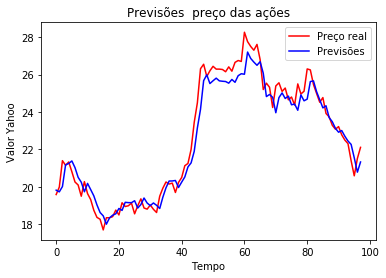

In [62]:
plt.plot(preco_real_teste, color='red', label= 'Preço real')
plt.plot(previsoes, color='blue', label='Previsões')
plt.title('Previsões  preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()